# Tarea 2 - Redes Convolucionales
  Ana Lerones, 18-10442

- Implementar un modelo de clasificación de imágenes simple con una CNN en el conjunto de datos CIFAR-10.
- Observar el efecto de los distintos hiperparámetros y la arquitectura de la red en el rendimiento de de la clasificación.
- Visualizar los mapas de características generados por las capas de la CNN para entender qué características aprenden las capas profundas de la red.
---


  Librerías y módulos:

In [ ]:
import os.path
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
import random
import functions

# 1. Preparación del banco de imágenes
---
Antes de comenzar con el diseño de los modelos es importante enfocarse en el preprocesamiento de la data a utilizar.

El conjunto CIFAR-10 consiste en 60000 imágenes, donde se tiene:
- **Dimensión de las imágenes:** 32x32x3
- **Tamaño del conjunto de entrenamiento:** 50000
- **Tamaño del conjunto de prueba:** 10000
- **Número de clases:** 10
- **Imágenes por clase en el conjunto de entrenamiento:** 5000

Generalmente en el preprocesamiento se busca uniformizar la data, es decir, redimensionar las imágenes para que todas tengan el mismo tamaño y de manera que todas las imágenes puedan ser entradas de una misma red. Sin embargo, en el CIFAR-10 ya todas las imagenes poseen las mismas dimensiones y no es necesario modificarlas; simplemente se debe adaptar el modelo de la red a esas dimensiones.

Por otra parte, para mejorar el rendimiento de los modelos, se recomienda utilizar la data normalizada y con una distribución uniforme entre las clases. Como la data son arreglos con valores entre 0 y 255, para normalizarla entre valores de 0 y 1 solo se debe dividir entre el valor máximo (255). Además, el conjunto de entrenamiento ya se encuentra distribuido uniformemente entre las clases.

Finalmente, también es necesario codificar las etiquetas de la data. En vez de tener una clasificación categórica (valores entre 0 y 9), se busca que cada etiqueta tenga el estado respecto a todas las clases. Es decir:

`Rana: 6 -> [0 0 0 0 0 0 1 0 0 0] `



In [ ]:
# Cargar el dataset
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Normalización
train_images = functions.normalize(train_images)
test_images = functions.normalize(test_images)

# Codificación
train_labels = functions.encode(train_labels, 10)
test_labels = functions.encode(test_labels, 10)

# 2. Creación y entrenamiento de los modelos
---
Para observar el efecto de los distintos hiperparámetros y la arquitectura de la red en el rendimiento de de la clasificación, se entrenarán 5 modelos. Uno de ellos tiene una arquitectura solo con capas de convolución, mientras que el resto tienen también capas de MaxPooling y Dropout, y comparten la misma arquitectura con variaciones en los hiperparámetros.

## Primer modelo
- Arquitectura sin MaxPooling y sin Dropout
- Learning rate 0.001
- Batchsize 32
- Epochs 10

In [ ]:
classes = 10
batch_size = 32
epochs = 10
learning_rate = 0.001

In [ ]:
first_model = functions.create_simplify_model(train_images.shape[1:], classes, learning_rate)

In [ ]:
history_1 = first_model.fit(train_images, train_labels, batch_size=batch_size,
                    epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 1358s 868ms/step - loss: 1.3440 - acc: 0.5162
Epoch 2/10
1563/1563 [==============================] - 1258s 805ms/step - loss: 0.8527 - acc: 0.6985
Epoch 3/10
1563/1563 [==============================] - 1261s 807ms/step - loss: 0.4953 - acc: 0.8262
Epoch 4/10
1563/1563 [==============================] - 1254s 802ms/step - loss: 0.1904 - acc: 0.9341
Epoch 5/10
1563/1563 [==============================] - 1259s 805ms/step - loss: 0.0938 - acc: 0.9692
Epoch 6/10
1563/1563 [==============================] - 1266s 810ms/step - loss: 0.0745 - acc: 0.9757
Epoch 7/10
1563/1563 [==============================] - 1268s 811ms/step - loss: 0.0652 - acc: 0.9789
Epoch 8/10
1563/1563 [==============================] - 1266s 810ms/step - loss: 0.0605 - acc: 0.9810
Epoch 9/10
1563/1563 [==============================] - 1286s 823ms/step - loss: 0.0525 - acc: 0.9840
Epoch 10/10
1563/1563 [==============================] - 1256s 803ms/step - loss: 

In [ ]:
first_model.save('CIFAR10/models/first_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
files.download('CIFAR10/models/first_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Segundo modelo
- Arquitectura con MaxPooling y Dropout
- Learning rate 0.001
- Batchsize 32
- Epochs 30

In [ ]:
classes = 10
batch_size = 32
epochs = 30
learning_rate = 0.001

In [ ]:
second_model = functions.create_model(train_images.shape[1:], classes, learning_rate)

In [ ]:
history_2 = second_model.fit(train_images, train_labels, batch_size=batch_size,
                    epochs=epochs)

Epoch 1/30
1563/1563 [==============================] - 211s 134ms/step - loss: 1.4935 - acc: 0.4586
Epoch 2/30
1563/1563 [==============================] - 211s 135ms/step - loss: 1.0877 - acc: 0.6164
Epoch 3/30
1563/1563 [==============================] - 212s 136ms/step - loss: 0.9396 - acc: 0.6707
Epoch 4/30
1563/1563 [==============================] - 208s 133ms/step - loss: 0.8525 - acc: 0.7004
Epoch 5/30
1563/1563 [==============================] - 207s 133ms/step - loss: 0.7895 - acc: 0.7212
Epoch 6/30
1563/1563 [==============================] - 210s 134ms/step - loss: 0.7392 - acc: 0.7400
Epoch 7/30
1563/1563 [==============================] - 210s 134ms/step - loss: 0.7025 - acc: 0.7529
Epoch 8/30
1563/1563 [==============================] - 208s 133ms/step - loss: 0.6699 - acc: 0.7647
Epoch 9/30
1563/1563 [==============================] - 209s 134ms/step - loss: 0.6432 - acc: 0.7741
Epoch 10/30
1563/1563 [==============================] - 212s 135ms/step - loss: 0.6223 - a

In [ ]:
second_model.save('CIFAR10/models/second_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
files.download('CIFAR10/models/second_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Tercer modelo
- Arquitectura con MaxPooling y Dropout
- Learning rate 0.001
- Batchsize 100
- Epochs 30

In [ ]:
classes = 10
batch_size = 100
epochs = 30
learning_rate = 0.001

In [ ]:
third_model = functions.create_model(train_images.shape[1:], classes, learning_rate)

In [ ]:
history_3 = third_model.fit(train_images, train_labels, batch_size=batch_size,
                    epochs=epochs)

Epoch 1/30
500/500 [==============================] - 221s 438ms/step - loss: 1.6353 - acc: 0.3966
Epoch 2/30
500/500 [==============================] - 198s 396ms/step - loss: 1.2188 - acc: 0.5639
Epoch 3/30
500/500 [==============================] - 192s 384ms/step - loss: 1.0248 - acc: 0.6376
Epoch 4/30
500/500 [==============================] - 183s 366ms/step - loss: 0.9095 - acc: 0.6795
Epoch 5/30
500/500 [==============================] - 186s 372ms/step - loss: 0.8312 - acc: 0.7109
Epoch 6/30
500/500 [==============================] - 186s 371ms/step - loss: 0.7680 - acc: 0.7325
Epoch 7/30
500/500 [==============================] - 185s 371ms/step - loss: 0.7233 - acc: 0.7478
Epoch 8/30
500/500 [==============================] - 183s 366ms/step - loss: 0.6830 - acc: 0.7613
Epoch 9/30
500/500 [==============================] - 183s 366ms/step - loss: 0.6507 - acc: 0.7708
Epoch 10/30
500/500 [==============================] - 182s 364ms/step - loss: 0.6195 - acc: 0.7811
Epoch 11/

In [ ]:
third_model.save('CIFAR10/models/third_model.h5')

In [ ]:
files.download('CIFAR10/models/third_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Cuarto modelo
- Arquitectura con MaxPooling y con Dropout
- Learning rate 0.05
- Batchsize 100
- Epochs 40

In [ ]:
classes = 10
batch_size = 100
epochs = 30
learning_rate = 0.05

In [ ]:
fourth_model = functions.create_model(train_images.shape[1:], classes, learning_rate)

In [ ]:
history_4 = fourth_model.fit(train_images, train_labels, batch_size=batch_size,
                    epochs=epochs)

Epoch 1/30
500/500 [==============================] - 211s 412ms/step - loss: 8.2691 - acc: 0.1022
Epoch 2/30
500/500 [==============================] - 194s 387ms/step - loss: 2.3062 - acc: 0.1006
Epoch 3/30
500/500 [==============================] - 194s 387ms/step - loss: 2.3059 - acc: 0.0989
Epoch 4/30
500/500 [==============================] - 194s 387ms/step - loss: 2.3063 - acc: 0.0991
Epoch 5/30
500/500 [==============================] - 184s 369ms/step - loss: 2.3061 - acc: 0.1017
Epoch 6/30
500/500 [==============================] - 188s 376ms/step - loss: 2.3066 - acc: 0.0995
Epoch 7/30
500/500 [==============================] - 191s 382ms/step - loss: 2.3063 - acc: 0.0999
Epoch 8/30
500/500 [==============================] - 185s 370ms/step - loss: 2.3070 - acc: 0.0992
Epoch 9/30
500/500 [==============================] - 182s 365ms/step - loss: 2.3062 - acc: 0.1000
Epoch 10/30
500/500 [==============================] - 183s 366ms/step - loss: 2.3064 - acc: 0.0992
Epoch 11/

In [ ]:
fourth_model.save('CIFAR10/models/fourth_model.h5')

In [ ]:
files.download('CIFAR10/models/fourth_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Quinto modelo
- Arquitectura con MaxPooling y Dropout
- Learning rate 0.001
- Batchsize 100
- Epochs 50

In [ ]:
classes = 10
batch_size = 100
epochs = 50
learning_rate = 0.001

In [ ]:
fifth_model = functions.create_model(train_images.shape[1:], classes, learning_rate)

In [ ]:
history_5 = fifth_model.fit(train_images, train_labels, batch_size=batch_size,
                    epochs=epochs)

Epoch 1/50
500/500 [==============================] - 203s 401ms/step - loss: 1.5723 - acc: 0.4230
Epoch 2/50
500/500 [==============================] - 193s 386ms/step - loss: 1.1800 - acc: 0.5808
Epoch 3/50
500/500 [==============================] - 191s 382ms/step - loss: 1.0196 - acc: 0.6395
Epoch 4/50
500/500 [==============================] - 196s 391ms/step - loss: 0.9248 - acc: 0.6726
Epoch 5/50
500/500 [==============================] - 194s 389ms/step - loss: 0.8496 - acc: 0.7007
Epoch 6/50
500/500 [==============================] - 194s 387ms/step - loss: 0.7876 - acc: 0.7228
Epoch 7/50
500/500 [==============================] - 195s 390ms/step - loss: 0.7395 - acc: 0.7414
Epoch 8/50
500/500 [==============================] - 193s 387ms/step - loss: 0.6949 - acc: 0.7569
Epoch 9/50
500/500 [==============================] - 195s 390ms/step - loss: 0.6564 - acc: 0.7683
Epoch 10/50
500/500 [==============================] - 196s 391ms/step - loss: 0.6243 - acc: 0.7796
Epoch 11/

In [ ]:
fifth_model.save('CIFAR10/models/fifth_model.h5')

In [ ]:
files.download('CIFAR10/models/fifth_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3. Evaluación de los modelos
---

- Curva de pérdida durante el entrenamiento

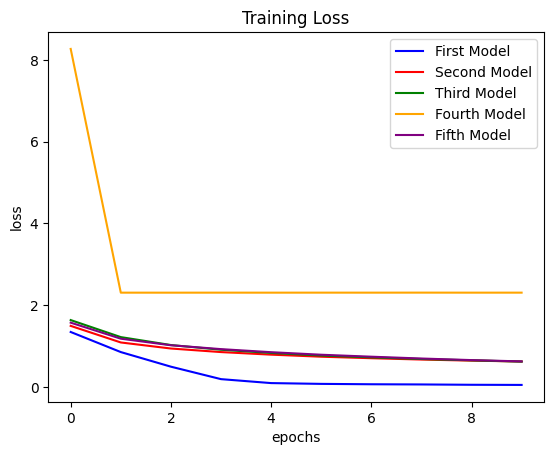

In [ ]:
# 10 primeros episodios de todos los modelos
plt.plot(history_1.history['loss'][:10], color='b', label="First Model")
plt.plot(history_2.history['loss'][:10], color='r', label="Second Model")
plt.plot(history_3.history['loss'][:10], color='g', label="Third Model")
plt.plot(history_4.history['loss'][:10], color='orange', label="Fourth Model")
plt.plot(history_5.history['loss'][:10], color='purple', label="Fifth Model")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Loss')
plt.legend()

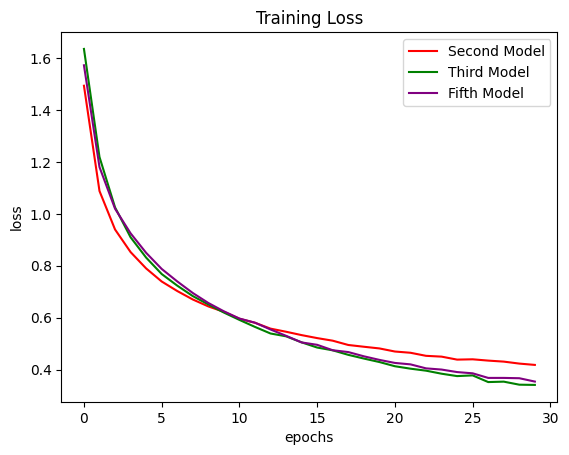

In [ ]:
# 30 primeros episodios de los mejores modelos
plt.plot(history_2.history['loss'], color='r', label="Second Model")
plt.plot(history_3.history['loss'], color='g', label="Third Model")
plt.plot(history_5.history['loss'][:30], color='purple', label="Fifth Model")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Loss')
plt.legend()

- Curva de exactitud durante el entrenamiento:

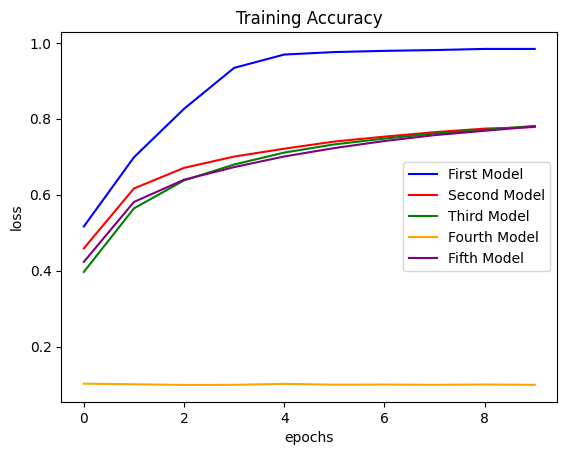

In [ ]:
# 10 primeros episodios de todos los modelos
plt.plot(history_1.history['acc'][:10], color='b', label="First Model")
plt.plot(history_2.history['acc'][:10], color='r', label="Second Model")
plt.plot(history_3.history['acc'][:10], color='g', label="Third Model")
plt.plot(history_4.history['acc'][:10], color='orange', label="Fourth Model")
plt.plot(history_5.history['acc'][:10], color='purple', label="Fifth Model")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Accuracy')
plt.legend()

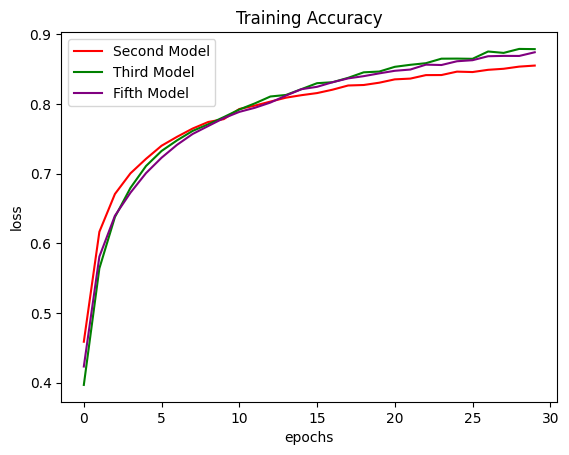

In [ ]:
# 30 primeros episodios de los mejores modelos
plt.plot(history_2.history['acc'], color='r', label="Second Model")
plt.plot(history_3.history['acc'], color='g', label="Third Model")
plt.plot(history_5.history['acc'][:30], color='purple', label="Fifth Model")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Accuracy')
plt.legend()

- Evaluación de los modelos en el conjunto de prueba:

In [ ]:
test_loss_1, test_acc_1 = first_model.evaluate(test_images, test_labels)
test_loss_2, test_acc_2 = second_model.evaluate(test_images, test_labels)
test_loss_3, test_acc_3 = third_model.evaluate(test_images, test_labels)
test_loss_4, test_acc_4 = fourth_model.evaluate(test_images, test_labels)
test_loss_5, test_acc_5 = fifth_model.evaluate(test_images, test_labels)

313/313 [==============================] - 14s 43ms/step - loss: 0.6550 - acc: 0.8039


Los cambios más evidentes se observan de las variaciones en la tasa de aprendizaje y la arquitectura de la red.

Vemos que al elevar la **tasa de aprendizaje** a 0.05, la red no logra entrenar y el modelo presenta los peores resultados. Una menor tasa de aprendizaje implica un aprendizaje más lento, ya que en el descenso de gradiente se realizan más actualizaciones de los parámetros (más pasos) para alcanzar el punto mínimo. Sin embargo, aunque una mayor tasa de aprendizaje permite tener actualizaciones más rápidas, es posible que si esta supera por mucho a la tasa óptima exista **divergencia**, tal y como ocurrió con el cuarto modelo entrenado.

Por otra parte, cuando se eliminan las capas de **Pooling y Dropout**, aunque el modelo logra obtener los mejores resultados durante el entrenamiento, su desempeño empeora notablemente con el conjunto de prueba. Esto se debe a que la falta de ambas capas puede contribuir al **sobreentrenamiento** de la red, además de relentizar el proceso de entrenamiento. Este comportamiento tiene sentido si analizamos las funciones de estas capas:

1. **Pooling Layers:** Se encargan de agrupar información, reduciendo las dimensiones de las imágenes y la complejidad computacional del modelo. Además, ayudan también a que el modelo sea más robusto frente a variaciones en los datos de entrada, ya que al eliminar o agrupar información de las imágenes, se le permite al modelo realizar un aprendizaje más generalizado de las distintas características en las imágenes.

2. **Dropout layers:** Se encargan de anular la contribución de algunas neuronas hacia la siguiente capa. Estas capas permiten evitar el sobreajuste de los datos de entrenamiento, ya que sin ellas el aprendizaje de los primeros lotes afecta al de los siguientes de forma desproporcionada, impidiendo el aprendizaje de características solo presentes en los lotes posteriores.

# 4. Mapa de características

Para observar el mapa de características y poder entender el aprendizaje de la red, decidimos trabajar con el tercer modelo entrenado:

In [ ]:
model = tf.keras.models.load_model('CIFAR10/models/third_model.h5')

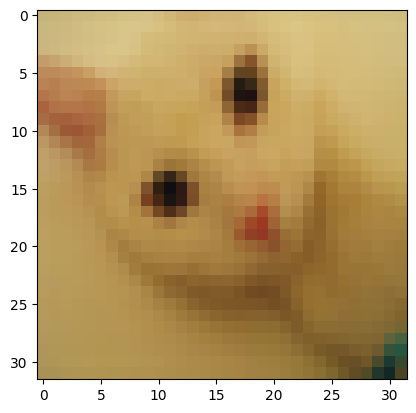

In [ ]:
# Seleccionar una imagen aleatoria del set de entrenamiento
sample = random.randint(0, train_images.shape[0] - 1)
plt.imshow(train_images[sample])

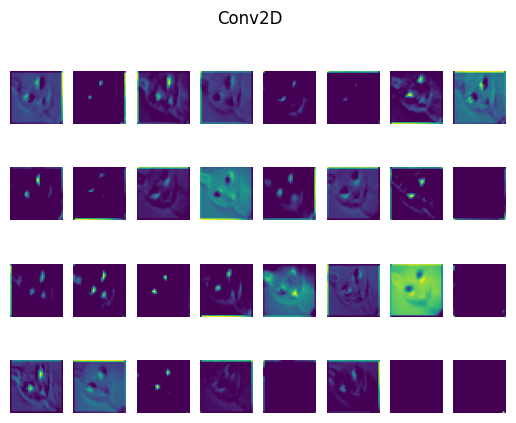

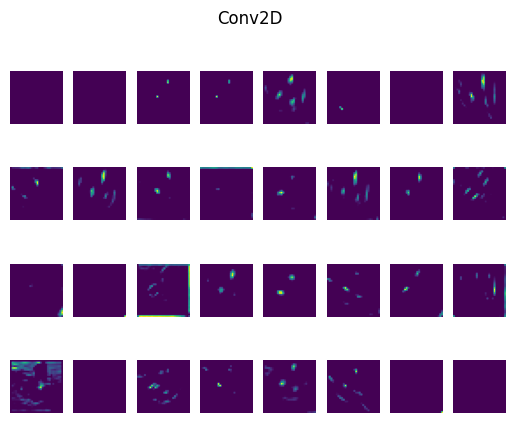

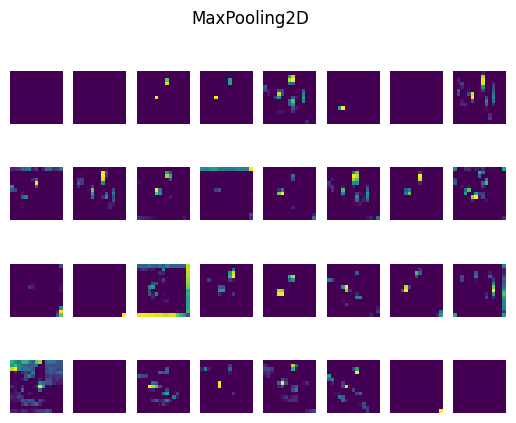

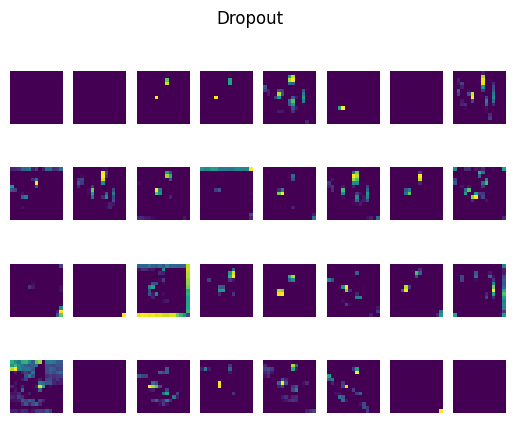

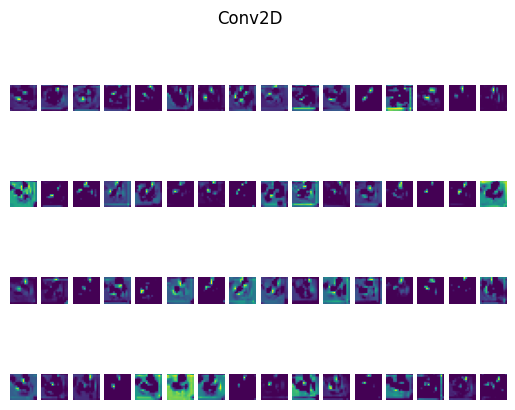

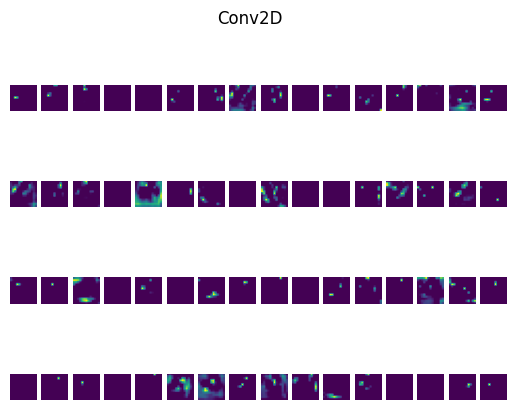

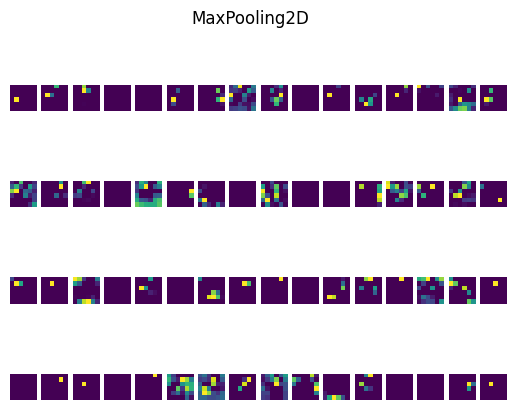

In [ ]:
# Ver el mapa de características en las primeras 7 capas del modelo
for j in range(len(model.layers)-5):
  activation_model = functions.map_features(model, model, j, train_images[sample])

Aunque no es posible detallar las características exactas que la red está aprendiendo con cada uno de sus neuronas, es posible ver que a medida que nos acercamos a las capas mas profundas, hay características de la imagen que se van resaltando, algunas abstractas para nosotros y otras más perceptibles. En el ejemplo anterior, vemos a lo largo de la red distinciones entre los ojos del gato, la nariz, la cara, bordes, secciones de cabello, el fondo. Igualmente, otras redes pueden ser entrenadas y en capas profundas reconocer rostros, textos, texturas, arrugas, entre otros, características que aydan a la clasificación de las imágenes con mayor facilidad, ya que en conjunto la presencia o ausencia de estas distintas características logran describir las clases bajo estudio.


# Referencias bibliográficas:
- Jang, A. (9 de junio de 2020). TensorFlow: CIFAR10 CNN Tutorial. Kaggle. https://www.kaggle.com/code/amyjang/tensorflow-cifar10-cnn-tutorial

- Molnar, C. (2022). Interpretable Machine Learning: A Guide for Making Black Box Models Explainable. https://christophm.github.io/interpretable-ml-book/index.html

- Tram, B. (10 de Noviembre de 2023). Neural Network: Convolutional Neural Net (CNN). Medium. https://baotramduong.medium.com/neural-network-convolutional-neural-net-cnn-17a1daf7de80

- Yosinski, J., Clune, J., Fuchs, T., y Lipson, H. (2015). Understanding Neural Networks Through Deep Visualization. https://yosinski.com/media/papers/Yosinski__2015__ICML_DL__Understanding_Neural_Networks_Through_Deep_Visualization__.pdf

